In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.feature_selection import RFE

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shahriariit/opendataset/master/Parkinson%20(1).csv')

In [ ]:
df.head()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0


In [ ]:
df.describe()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,0.023468,0.028671,59.328203,63.674583,74.198478,80.187240,81.505404,0.310517,0.612911,0.271958,0.917801,1.345764,1.302292,1.289089,1.349270,1.354317,1.338350,1.334774,1.339938,1.354771,1.346205,1.346094,1.355388,1.338195,1.338939,1.335040,1.342467,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144,0.500000
std,0.818203,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,0.014402,0.016610,14.541946,15.621195,16.442566,17.187765,17.395830,0.065639,0.077780,0.229851,0.033911,0.209207,0.235640,0.259544,0.215538,0.212376,0.216225,0.207402,0.216467,0.214952,0.203527,0.210776,0.215601,0.204511,0.222206,0.223335,0.227232,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819,0.501045
min,1.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,0.004103,0.006459,22.224723,26.274029,33.156101,36.494025,36.908213,0.162762,0.411359,0.004127,0.847307,0.770151,0.725522,0.569471,0.727609,0.771259,0.611540,0.829087,0.653565,0.839535,0.823632,0.813607,0.823157,0.844357,0.620845,0.647406,0.628107,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411,0.000000
25%,1.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012909,0.014986,0.019180,50.558623,54.237537,63.879230,69.823899,70.435013,0.263217,0.556756,0.040811,0.891408,1.208843,1.149207,1.122922,1.212101,1.218042,1.199275,1.204434,1.188848,1.220585,1.221013,1.229496,1.204163,1.197492,1.198202,1.182790,1.196205,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559,0.000000
50%,2.000000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,0.019897,0.024909,59.742330,64.844019,75.457858,80.992704,82.354119,0.305054,0.606502,0.246486,0.912809,1.340906,1.294779,1.298645,1.338791,1.342907,1.331794,1.323245,1.321939,1.340258,1.334706,1.338213,1.356528,1.338452,1.333607,1.341507,1.323866,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212,0.500000
75%,3.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,0.027900,0.033757,68.686365,73.439434,85.652177,92.330509,93.500429,0.349273,0.661144,0.405402,0.946479,1.491018,1.474178,1.479907,1.496511,1.497181,1.473760,1.452817,1.486387,1.482438,1.486456,1.466926,1.515044,1.474081,1.482893,1.485977,1.491861,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235,1.000000
max,3.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,0.120760,0.142440,101.206326,109.651117,120.712830,128.289325,129.985236,0.535953,0.784376,0.908395,0.987292,1.949103,1.835651,1.928430,1.857084,1.840846,1.976153,2.000783,2.016728,1.918429,2.039576,2.071291,1.983561,2.029982,2.028056,2.021287,1.979858,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103,1.000000


In [ ]:
print(df.shape)

(240, 47)


In [ ]:
df

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,0.008835,0.010232,0.015297,28.530790,28.625326,37.778480,43.165327,44.085825,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144,1
236,3,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,0.008436,0.011578,0.015473,33.617211,36.264629,45.526764,52.135100,53.417630,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835,1
237,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,0.015937,0.015441,0.021133,56.853169,64.663462,76.610752,82.794477,83.509902,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409,1
238,2,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,0.041295,0.027626,0.037650,60.096871,67.562663,79.713585,86.826843,87.382895,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188

In [ ]:
X=df.drop('Status', 1)
Y=df.Status

In [ ]:
df = pd.DataFrame(X)
print(df.head())

   Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
0          1       1     0.25546  ...  1.405495  1.416705  1.354610
1          2       1     0.36964  ...  1.314549  1.318999  1.323508
2          3       1     0.23514  ...  1.388910  1.305469  1.305402
3          1       0     0.29320  ...  1.638346  1.604008  1.621456
4          2       0     0.23075  ...  1.533666  1.297536  1.382023

[5 rows x 46 columns]


In [ ]:
#apply feature seletion method
# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
X = rfe.fit_transform(X, Y)
X.shape

(240, 10)

In [ ]:
X,Y

(array([[1.96600000e-02, 7.76267293e+01, 2.50432662e-01, ...,
         1.34746965e+00, 1.39787423e+00, 1.39029792e+00],
        [1.40970000e-02, 7.99892281e+01, 2.71444855e-01, ...,
         1.31652667e+00, 1.30239908e+00, 1.36575005e+00],
        [1.26830000e-02, 7.89305019e+01, 2.03530770e-01, ...,
         1.34046278e+00, 1.31288878e+00, 1.24338464e+00],
        ...,
        [1.54410000e-02, 8.27944773e+01, 2.63589018e-01, ...,
         1.36898572e+00, 1.28377838e+00, 1.41086934e+00],
        [2.76260000e-02, 8.68268429e+01, 3.41670566e-01, ...,
         1.39678551e+00, 1.31349407e+00, 1.29507625e+00],
        [1.24320000e-02, 8.16233060e+01, 2.53675697e-01, ...,
         1.37760245e+00, 1.38681380e+00, 1.39227195e+00]]), 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238    1
 239    1
 Name: Status, Length: 240, dtype: int64)

In [ ]:
y = Y

In [ ]:
X

array([[1.96600000e-02, 7.76267293e+01, 2.50432662e-01, ...,
        1.34746965e+00, 1.39787423e+00, 1.39029792e+00],
       [1.40970000e-02, 7.99892281e+01, 2.71444855e-01, ...,
        1.31652667e+00, 1.30239908e+00, 1.36575005e+00],
       [1.26830000e-02, 7.89305019e+01, 2.03530770e-01, ...,
        1.34046278e+00, 1.31288878e+00, 1.24338464e+00],
       ...,
       [1.54410000e-02, 8.27944773e+01, 2.63589018e-01, ...,
        1.36898572e+00, 1.28377838e+00, 1.41086934e+00],
       [2.76260000e-02, 8.68268429e+01, 3.41670566e-01, ...,
        1.39678551e+00, 1.31349407e+00, 1.29507625e+00],
       [1.24320000e-02, 8.16233060e+01, 2.53675697e-01, ...,
        1.37760245e+00, 1.38681380e+00, 1.39227195e+00]])

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: Status, Length: 240, dtype: int64

In [ ]:
df = pd.DataFrame(X)
df['Status']=y

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,Status
0,0.019660,77.626729,0.250433,0.005397,1.329085,1.284922,1.239354,1.347470,1.397874,1.390298,0
1,0.014097,79.989228,0.271445,0.075617,1.187177,1.256340,1.283629,1.316527,1.302399,1.365750,0
2,0.012683,78.930502,0.203531,0.005283,1.346296,1.339797,1.391798,1.340463,1.312889,1.243385,0
3,0.015696,84.367682,0.261360,0.030518,1.498323,1.561722,1.626319,1.618487,1.379629,1.309647,0
4,0.008385,91.033967,0.222069,0.035602,1.613747,1.501956,1.385013,1.421549,1.252247,1.583072,0
...,...,...,...,...,...,...,...,...,...,...,...
235,0.010232,43.165327,0.215651,0.167809,1.149514,1.137022,1.137069,1.112929,1.111652,1.149059,1
236,0.011578,52.135100,0.220526,0.246111,1.108991,1.101534,1.093827,1.099811,1.112963,1.057239,1
237,0.015441,82.794477,0.263589,0.711209,1.367463,1.274210,1.384608,1.368986,1.283778,1.410869,1
238,0.027626,86.826843,0.341671,0.736968,1.335188,1.319729,1.272970,1.396786,1.313494,1.295076,1


In [ ]:
print(df.shape)
print(df.info())

(240, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float64
 1   1       240 non-null    float64
 2   2       240 non-null    float64
 3   3       240 non-null    float64
 4   4       240 non-null    float64
 5   5       240 non-null    float64
 6   6       240 non-null    float64
 7   7       240 non-null    float64
 8   8       240 non-null    float64
 9   9       240 non-null    float64
 10  Status  240 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 20.8 KB
None


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.023468,80.187240,0.310517,0.271958,1.349270,1.354317,1.334774,1.346205,1.338939,1.342467,0.500000
std,0.014402,17.187765,0.065639,0.229851,0.215538,0.212376,0.207402,0.203527,0.222206,0.227232,0.501045
min,0.004103,36.494025,0.162762,0.004127,0.727609,0.771259,0.829087,0.823632,0.620845,0.628107,0.000000
25%,0.014986,69.823899,0.263217,0.040811,1.212101,1.218042,1.204434,1.221013,1.198202,1.196205,0.000000
50%,0.019897,80.992704,0.305054,0.246486,1.338791,1.342907,1.323245,1.334706,1.333607,1.323866,0.500000
75%,0.027900,92.330509,0.349273,0.405402,1.496511,1.497181,1.452817,1.486456,1.482893,1.491861,1.000000
max,0.120760,128.289325,0.535953,0.908395,1.857084,1.840846,2.000783,2.039576,2.028056,1.979858,1.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0          0.012914
1         22.506610
2          0.086056
3          0.364591
4          0.284410
5          0.279138
6          0.248383
7          0.265443
8          0.284692
9          0.295655
Status     1.000000
dtype: float64


In [ ]:
df = df[~((df< (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis =1)]

In [ ]:
print(df.shape)

(219, 11)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,Status
0,0.019660,77.626729,0.250433,0.005397,1.329085,1.284922,1.239354,1.347470,1.397874,1.390298,0
1,0.014097,79.989228,0.271445,0.075617,1.187177,1.256340,1.283629,1.316527,1.302399,1.365750,0
2,0.012683,78.930502,0.203531,0.005283,1.346296,1.339797,1.391798,1.340463,1.312889,1.243385,0
3,0.015696,84.367682,0.261360,0.030518,1.498323,1.561722,1.626319,1.618487,1.379629,1.309647,0
4,0.008385,91.033967,0.222069,0.035602,1.613747,1.501956,1.385013,1.421549,1.252247,1.583072,0
...,...,...,...,...,...,...,...,...,...,...,...
235,0.010232,43.165327,0.215651,0.167809,1.149514,1.137022,1.137069,1.112929,1.111652,1.149059,1
236,0.011578,52.135100,0.220526,0.246111,1.108991,1.101534,1.093827,1.099811,1.112963,1.057239,1
237,0.015441,82.794477,0.263589,0.711209,1.367463,1.274210,1.384608,1.368986,1.283778,1.410869,1
238,0.027626,86.826843,0.341671,0.736968,1.335188,1.319729,1.272970,1.396786,1.313494,1.295076,1


In [ ]:
X=df.drop('Status', 1)
Y=df.Status

In [ ]:
df = pd.DataFrame(X)
print(df.head())

          0          1         2  ...         7         8         9
0  0.019660  77.626729  0.250433  ...  1.347470  1.397874  1.390298
1  0.014097  79.989228  0.271445  ...  1.316527  1.302399  1.365750
2  0.012683  78.930502  0.203531  ...  1.340463  1.312889  1.243385
3  0.015696  84.367682  0.261360  ...  1.618487  1.379629  1.309647
4  0.008385  91.033967  0.222069  ...  1.421549  1.252247  1.583072

[5 rows x 10 columns]


In [ ]:
y = Y

In [ ]:
X, y

(            0          1         2  ...         7         8         9
 0    0.019660  77.626729  0.250433  ...  1.347470  1.397874  1.390298
 1    0.014097  79.989228  0.271445  ...  1.316527  1.302399  1.365750
 2    0.012683  78.930502  0.203531  ...  1.340463  1.312889  1.243385
 3    0.015696  84.367682  0.261360  ...  1.618487  1.379629  1.309647
 4    0.008385  91.033967  0.222069  ...  1.421549  1.252247  1.583072
 ..        ...        ...       ...  ...       ...       ...       ...
 235  0.010232  43.165327  0.215651  ...  1.112929  1.111652  1.149059
 236  0.011578  52.135100  0.220526  ...  1.099811  1.112963  1.057239
 237  0.015441  82.794477  0.263589  ...  1.368986  1.283778  1.410869
 238  0.027626  86.826843  0.341671  ...  1.396786  1.313494  1.295076
 239  0.012432  81.623306  0.253676  ...  1.377602  1.386814  1.392272
 
 [219 rows x 10 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238    1
 239    1
 Name: Stat

In [ ]:
classifier_name = []
accuracy = []
roc = []
f_measure = []
geometric_mean = []
sensitivity = []
specificity = []
false_positive_rate = []
false_negative_rate = []
fpositive_rate_curve = []
tpositive_rate_curve = []

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)
y_pred = cross_val_predict(estimator = dt, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred, average = 'weighted'))
print('F-Measure :      ', f1_score(y, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('DT')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)





Accuracy :        0.7808219178082192
ROC :             0.7775083612040135
F-Measure :       0.7795465520069682
Geometric Mean :  0.7775013003749777
Sensitivity :     0.7808219178082192
Specificity :     0.7741948045998076
False Positive Rate (Fall Out): 0.2258051954001924
False Negative Rate (Miss Rate): 0.2191780821917808


In [ ]:
knn = KNeighborsClassifier()
y_pred = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('KNN')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7123287671232876
ROC :             0.7099916387959866
F-Measure :       0.6865671641791045
Geometric Mean :  0.7099877921425075
Sensitivity :     0.7123287671232876
Specificity :     0.7076545104686855
False Positive Rate (Fall Out): 0.29234548953131445
False Negative Rate (Miss Rate): 0.28767123287671237


In [ ]:
nb = GaussianNB()
y_pred = cross_val_predict(estimator = nb, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GNB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.8082191780821918
ROC :             0.8081939799331104
F-Measure :       0.7999999999999999
Geometric Mean :  0.8081939795402922
Sensitivity :     0.8082191780821918
Specificity :     0.808168781784029
False Positive Rate (Fall Out): 0.19183121821597104
False Negative Rate (Miss Rate): 0.1917808219178082


In [ ]:
sv = svm.SVC(gamma='auto')
y_pred = cross_val_predict(estimator = sv, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SVM')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7397260273972602
ROC :             0.7323996655518396
F-Measure :       0.6815642458100559
Geometric Mean :  0.7323630209961152
Sensitivity :     0.7397260273972602
Specificity :     0.7250733037064186
False Positive Rate (Fall Out): 0.27492669629358135
False Negative Rate (Miss Rate): 0.26027397260273977


In [ ]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
y_pred = cross_val_predict(estimator = logreg, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('LR')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.8310502283105022
ROC :             0.8290133779264213
F-Measure :       0.8159203980099502
Geometric Mean :  0.8290108756955414
Sensitivity :     0.8310502283105022
Specificity :     0.8269765275423406
False Positive Rate (Fall Out): 0.17302347245765937
False Negative Rate (Miss Rate): 0.16894977168949776


In [ ]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = cross_val_predict(estimator = mlp, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('MLP')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5251141552511416
ROC :             0.5
F-Measure :       0.0
Geometric Mean :  0.4993688808946965
Sensitivity :     0.5251141552511416
Specificity :     0.4748858447488584
False Positive Rate (Fall Out): 0.5251141552511416
False Negative Rate (Miss Rate): 0.4748858447488584


In [ ]:
xgb = XGBClassifier()
y_pred = cross_val_predict(estimator = xgb, X = X, y = y, cv = 10) 

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('XGB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7853881278538812
ROC :             0.7827759197324415
F-Measure :       0.763819095477387
Geometric Mean :  0.7827715611094337
Sensitivity :     0.7853881278538812
Specificity :     0.7801637116110016
False Positive Rate (Fall Out): 0.21983628838899838
False Negative Rate (Miss Rate): 0.21461187214611877


In [ ]:
randomfForest = RandomForestClassifier(n_estimators=10)
y_pred = cross_val_predict(estimator = randomfForest, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('RF')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.771689497716895
ROC :             0.7688127090301003
F-Measure :       0.7474747474747475
Geometric Mean :  0.7688073267425678
Sensitivity :     0.771689497716895
Specificity :     0.7659359203433058
False Positive Rate (Fall Out): 0.23406407965669418
False Negative Rate (Miss Rate): 0.228310502283105


In [ ]:
extraTree = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
y_pred = cross_val_predict(estimator = extraTree, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('ET')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7625570776255708
ROC :             0.7578177257525083
F-Measure :       0.7263157894736841
Geometric Mean :  0.7578029057799444
Sensitivity :     0.7625570776255708
Specificity :     0.753078373879446
False Positive Rate (Fall Out): 0.24692162612055402
False Negative Rate (Miss Rate): 0.2374429223744292


In [ ]:
adaBoost = AdaBoostClassifier(n_estimators=100)
y_pred = cross_val_predict(estimator = adaBoost, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('AdaBoost')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.6986301369863014
ROC :             0.6955685618729097
F-Measure :       0.6666666666666666
Geometric Mean :  0.6955618240126271
Sensitivity :     0.6986301369863014
Specificity :     0.6925069867595179
False Positive Rate (Fall Out): 0.30749301324048206
False Negative Rate (Miss Rate): 0.3013698630136986


In [ ]:
GradientBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
y_pred = cross_val_predict(estimator = GradientBoost, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7488584474885844
ROC :             0.7456939799331104
F-Measure :       0.7208121827411167
Geometric Mean :  0.7456872654495129
Sensitivity :     0.7488584474885844
Specificity :     0.7425295123776362
False Positive Rate (Fall Out): 0.2574704876223638
False Negative Rate (Miss Rate): 0.25114155251141557


In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
y_pred = cross_val_predict(estimator = sgd, X = X, y = y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [ ]:

print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SGD')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5159817351598174
ROC :             0.4959030100334449
F-Measure :       0.15873015873015872
Geometric Mean :  0.4954963573605062
Sensitivity :     0.5159817351598174
Specificity :     0.4758242849070723
False Positive Rate (Fall Out): 0.5241757150929277
False Negative Rate (Miss Rate): 0.4840182648401826


In [ ]:
list_of_result_parameters = list(zip(classifier_name, accuracy, roc, f_measure, geometric_mean,sensitivity,specificity,false_positive_rate, false_negative_rate))

In [ ]:
df_result = pd.DataFrame(list_of_result_parameters, columns = ['Classifier','Accuracy', 'ROC', 'F-Measure', 'Geometric Mean', 'Sensitivity', 'Specificity', 'False Positive Rate (Fall Out)', 'False Negative Rate (Miss Rate)'])

In [ ]:
df_result

,Classifier,Accuracy,ROC,F-Measure,Geometric Mean,Sensitivity,Specificity,False Positive Rate (Fall Out),False Negative Rate (Miss Rate)
0,DT,0.780822,0.777508,0.779547,0.777501,0.780822,0.774195,0.225805,0.219178
1,KNN,0.712329,0.709992,0.711568,0.709988,0.712329,0.707655,0.292345,0.287671
2,GNB,0.808219,0.808194,0.808291,0.808194,0.808219,0.808169,0.191831,0.191781
3,SVM,0.739726,0.732400,0.733214,0.732363,0.739726,0.725073,0.274927,0.260274
4,LR,0.831050,0.829013,0.830603,0.829011,0.831050,0.826977,0.173023,0.168950
5,MLP,0.525114,0.500000,0.361606,0.499369,0.525114,0.474886,0.525114,0.474886
6,XGB,0.785388,0.782776,0.784576,0.782772,0.785388,0.780164,0.219836,0.214612
7,RF,0.771689,0.768813,0.770681,0.768807,0.771689,0.765936,0.234064,0.228311
8,ET,0.762557,0.757818,0.759927,0.757803,0.762557,0.753078,0.246922,0.237443
9,AdaBoost,0.698630,0.695569,0.697298,0.695562,0.698630,0.692507,0.307493,0.301370


In [ ]:
#No need to sort the table //df_final_result = df_result.sort_values(['Accuracy','F-Measure'], ascending = False)

In [ ]:
#df_final_result

In [ ]:
from google.colab import files
# create excel writer object
writer = pd.ExcelWriter('RFEBasedResult.xlsx')
# write dataframe to excel
df_result.to_excel(writer)
# save the excel
writer.save()
files.download('RFEBasedResult.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

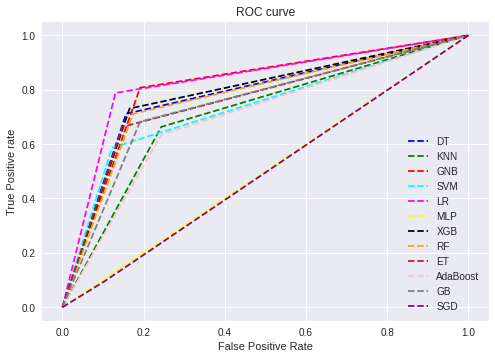

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpositive_rate_curve[0], tpositive_rate_curve[0], linestyle='--',color='blue', label='DT')
plt.plot(fpositive_rate_curve[1], tpositive_rate_curve[1], linestyle='--',color='green', label='KNN')
plt.plot(fpositive_rate_curve[2], tpositive_rate_curve[2], linestyle='--',color='red', label='GNB')
plt.plot(fpositive_rate_curve[3], tpositive_rate_curve[3], linestyle='--',color='cyan', label='SVM')
plt.plot(fpositive_rate_curve[4], tpositive_rate_curve[4], linestyle='--',color='magenta', label='LR')
plt.plot(fpositive_rate_curve[5], tpositive_rate_curve[5], linestyle='--',color='yellow', label='MLP')
plt.plot(fpositive_rate_curve[6], tpositive_rate_curve[6], linestyle='--',color='black', label='XGB')
plt.plot(fpositive_rate_curve[7], tpositive_rate_curve[7], linestyle='--',color='orange', label='RF')
plt.plot(fpositive_rate_curve[8], tpositive_rate_curve[8], linestyle='--',color='brown', label='ET')
plt.plot(fpositive_rate_curve[9], tpositive_rate_curve[9], linestyle='--',color='pink', label='AdaBoost')
plt.plot(fpositive_rate_curve[10], tpositive_rate_curve[10], linestyle='--',color='gray', label='GB')
plt.plot(fpositive_rate_curve[11], tpositive_rate_curve[11], linestyle='--',color='purple', label='SGD')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('RFEBasedResult_ROC_curve.png',dpi=300)
plt.show();
files.download('RFEBasedResult_ROC_curve.png')